In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score

from keras.models import Sequential
from keras.layers import Dense

print("Packages Imported Successfully!")

Packages Imported Successfully!


In [63]:
trainData = pd.read_csv("dataset\Training.csv")
trainData = trainData.drop("Unnamed: 133", axis = 1)

In [64]:
trainData["prognosis"].value_counts()

Hyperthyroidism                            120
Impetigo                                   120
Hypertension                               120
GERD                                       120
Diabetes                                   120
Allergy                                    120
Hepatitis D                                120
Typhoid                                    120
Migraine                                   120
(vertigo) Paroymsal  Positional Vertigo    120
Fungal infection                           120
Hypoglycemia                               120
Varicose veins                             120
Common Cold                                120
Pneumonia                                  120
Cervical spondylosis                       120
Alcoholic hepatitis                        120
Dimorphic hemmorhoids(piles)               120
Gastroenteritis                            120
Chronic cholestasis                        120
hepatitis A                                120
AIDS         

In [65]:
testData = pd.read_csv("dataset\Testing.csv")

In [66]:
xTrain = trainData.drop("prognosis", axis = 1)
yTrain = trainData["prognosis"]
yTrain = np.array(yTrain).reshape(yTrain.shape[0], 1)

In [67]:
xTest = testData.drop("prognosis", axis = 1)
yTest = testData["prognosis"]
yTest = np.array(yTest).reshape(yTest.shape[0], 1)

In [68]:
print("xTrain: {}\nyTrain: {}\nxTest: {}\nyTest: {}\n".format(xTrain.shape, yTrain.shape, xTest.shape, yTest.shape))

xTrain: (4920, 132)
yTrain: (4920, 1)
xTest: (42, 132)
yTest: (42, 1)



In [69]:
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(xTrain, yTrain)
predictions = DecisionTree.predict(xTest)
accuracy = DecisionTree.score(xTest, yTest)

In [70]:
for i in range(len(predictions)):
    print("Pred: {}\nReal: {}\n\n".format(predictions[i], yTest[i][0]))

Pred: Fungal infection
Real: Fungal infection


Pred: Allergy
Real: Allergy


Pred: GERD
Real: GERD


Pred: Chronic cholestasis
Real: Chronic cholestasis


Pred: Drug Reaction
Real: Drug Reaction


Pred: Peptic ulcer diseae
Real: Peptic ulcer diseae


Pred: AIDS
Real: AIDS


Pred: Diabetes 
Real: Diabetes 


Pred: Gastroenteritis
Real: Gastroenteritis


Pred: Bronchial Asthma
Real: Bronchial Asthma


Pred: Hypertension 
Real: Hypertension 


Pred: Migraine
Real: Migraine


Pred: Cervical spondylosis
Real: Cervical spondylosis


Pred: Paralysis (brain hemorrhage)
Real: Paralysis (brain hemorrhage)


Pred: Jaundice
Real: Jaundice


Pred: Malaria
Real: Malaria


Pred: Chicken pox
Real: Chicken pox


Pred: Dengue
Real: Dengue


Pred: Typhoid
Real: Typhoid


Pred: hepatitis A
Real: hepatitis A


Pred: Hepatitis B
Real: Hepatitis B


Pred: Hepatitis C
Real: Hepatitis C


Pred: Hepatitis D
Real: Hepatitis D


Pred: Hepatitis E
Real: Hepatitis E


Pred: Alcoholic hepatitis
Real: Alcoholic hepa

In [71]:
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 97.62%


In [72]:
print(classification_report(yTest, predictions))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

In [73]:
featuresImportant = pd.DataFrame(DecisionTree.feature_importances_ * 100, xTrain.columns, columns = ["Importance"])
featuresImportant = featuresImportant.sort_values(by = "Importance", ascending = False)
print(featuresImportant)

                                Importance
high_fever                        4.552171
yellowing_of_eyes                 3.646366
receiving_unsterile_injections    2.500000
muscle_pain                       2.500000
red_spots_over_body               2.500000
...                                    ...
spinning_movements                0.000000
sweating                          0.000000
swelling_joints                   0.000000
stiff_neck                        0.000000
bruising                          0.000000

[132 rows x 1 columns]


In [74]:
featuresZeroes = np.array(featuresImportant[featuresImportant["Importance"] == 0.000000].index)
featuresZeroes

array(['pain_during_bowel_movements', 'weight_gain', 'muscle_wasting',
       'receiving_blood_transfusion', 'visual_disturbances',
       'burning_micturition', 'back_pain', 'polyuria', 'stomach_bleeding',
       'anxiety', 'watering_from_eyes', 'cold_hands_and_feets',
       'mood_swings', 'belly_pain', 'restlessness', 'ulcers_on_tongue',
       'malaise', 'patches_in_throat', 'scurring', 'yellow_urine',
       'blister', 'inflammatory_nails', 'small_dents_in_nails',
       'silver_like_dusting', 'constipation', 'acute_liver_failure',
       'history_of_alcohol_consumption', 'fluid_overload',
       'painful_walking', 'shivering', 'swelling_of_stomach',
       'swelled_lymph_nodes', 'acidity', 'lethargy', 'phlegm',
       'yellowish_skin', 'puffy_face_and_eyes',
       'drying_and_tingling_lips', 'congestion', 'excessive_hunger',
       'swollen_extremeties', 'indigestion', 'enlarged_thyroid',
       'swollen_blood_vessels', 'knee_pain', 'swollen_legs', 'nausea',
       'cramps', 'he

In [75]:
trainData = trainData.drop(columns = featuresZeroes, axis = 1)
testData = testData.drop(columns = featuresZeroes, axis = 1)

In [76]:
xTrain = trainData.drop("prognosis", axis = 1)
yTrain = trainData["prognosis"]
xTest = testData.drop("prognosis", axis = 1)
yTest = testData["prognosis"]

In [77]:
print("xTrain: {}\nyTrain: {}\nxTest: {}\nyTest: {}\n".format(xTrain.shape, yTrain.shape, xTest.shape, yTest.shape))

xTrain: (4920, 62)
yTrain: (4920,)
xTest: (42, 62)
yTest: (42,)



In [81]:
yTrainEncoded = pd.get_dummies(yTrain)
yTestEncoded = pd.get_dummies(yTest)
yTestEncoded.shape

(42, 41)

In [96]:
model = Sequential()
model.add(Dense(32, input_dim = xTrain.shape[1], activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(yTrainEncoded.shape[1], activation = "softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                2016      
_________________________________________________________________
dense_13 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_14 (Dense)             (None, 41)                697       
Total params: 3,241
Trainable params: 3,241
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [98]:
history = model.fit(xTrain, yTrainEncoded, batch_size = 120, epochs = 30, validation_split = 0.3)

Epoch 1/30
29/29 [==============================] - 1s 12ms/step - loss: 0.6827 - accuracy: 0.0054 - val_loss: 0.6246 - val_accuracy: 0.0244
Epoch 2/30
29/29 [==============================] - 0s 4ms/step - loss: 0.5923 - accuracy: 0.0274 - val_loss: 0.4412 - val_accuracy: 0.0000e+00
Epoch 3/30
29/29 [==============================] - 0s 5ms/step - loss: 0.3884 - accuracy: 0.0113 - val_loss: 0.2156 - val_accuracy: 0.0244
Epoch 4/30
29/29 [==============================] - 0s 4ms/step - loss: 0.1944 - accuracy: 0.0244 - val_loss: 0.1415 - val_accuracy: 0.0244
Epoch 5/30
29/29 [==============================] - 0s 4ms/step - loss: 0.1398 - accuracy: 0.0252 - val_loss: 0.1278 - val_accuracy: 0.0244
Epoch 6/30
29/29 [==============================] - 0s 4ms/step - loss: 0.1267 - accuracy: 0.0354 - val_loss: 0.1196 - val_accuracy: 0.0732
Epoch 7/30
29/29 [==============================] - 0s 4ms/step - loss: 0.1203 - accuracy: 0.0789 - val_loss: 0.1139 - val_accuracy: 0.1220
Epoch 8/30
29/2

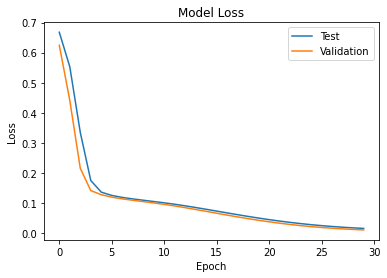

In [99]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

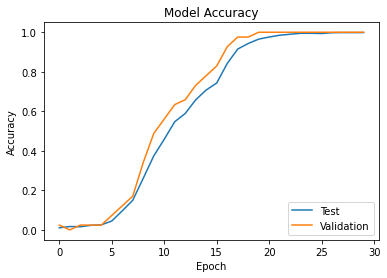

In [100]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='lower right')
plt.show()

In [102]:
score = model.evaluate(xTest, yTestEncoded, steps = 5, batch_size = 1, verbose = 2)

5/5 - 0s - loss: 0.0124 - accuracy: 1.0000


In [103]:
print("Loss: {}\nAccuracy: {}%\n".format(score[0], score[1]*100))

Loss: 0.012352380901575089
Accuracy: 100.0%



In [104]:
model.save("DiseasePredictionWeights.h5")